<h1> Dye Test </h1>

In this test, we will be making a soln using two different dye sols. 

The is the procedure:
0. Initialise machine 
1. Home Jubilee
2. Load tools
3. Fill Dual syringe with dye
4. Place lid on precursors
5. Fill vial with solvent 
6. Fill vial with precursors
7. Mix the vial
8. Record vial spectrometer data 2 times

In [1]:
# Import libs

# Importing libraries
import numpy as np
import time 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd


from science_jubilee.Machine import Machine
from science_jubilee.tools.Tool import Tool
from science_jubilee.decks.Deck import Deck
from science_jubilee.labware.Labware import Labware, Location, Well
# from science_jubilee.tools.Pipette import Pipette
from science_jubilee.tools.Double_Syringe import DoubleSyringe
from science_jubilee.tools.Syringe import Syringe
from science_jubilee.tools.Vacuum_Gripper import VacuumGripper
from science_jubilee.tools.Oceandirect_axo import Spectrometer

In [2]:
# Manual Offsetting 

deck = Deck("lab_automation_deck") # We are not using the deck, so operate any deck.json 

solvents = deck.load_labware("uwsunlab_2_wellplate_60000ul_slot3.json", slot = 3, has_lid_on_top= False, currentLiquidVolume= 60)
solvents.manual_offset_small_plate([[245.0, 155.8], [197.0, 155.8]], save = True)

# -------------Position JSON file for Single Syringe ---------------------#
samples2_ssy = deck.load_labware("uwsunlab_10_wellplate_14000ul_ssy_1.json", slot = 2, has_lid_on_top= False) 
samples2_ssy.manual_offset2([[132.0, 134.0], [38.0, 134.0], [38.0, 175.0]], save = True)
samples5_ssy = deck.load_labware("uwsunlab_10_wellplate_14000ul_ssy_2.json", slot = 5, has_lid_on_top= False)
samples5_ssy.manual_offset2([[271.0, 231.0], [177.0, 231.0], [177.0, 273.0]], save = True)
    
# -------------Position JSON file for Dual Syringe ---------------#
samples2_sy = deck.load_labware('uwsunlab_10_wellplate_14000ul_sy_1.json', slot = 2, has_lid_on_top= False)       #new config
samples2_sy.manual_offset2([[130.7, 131.6],[37.7, 131.6], [37.7, 172.6]], save = True)
samples5_sy = deck.load_labware('uwsunlab_10_wellplate_14000ul_sy_2.json', slot = 5, has_lid_on_top= False)     #new config
samples5_sy.manual_offset2([[270.0, 228.0], [178.0, 228.0], [177.0, 270.0]], save = True)

precursors = deck.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', slot = 1, has_lid_on_top= False, currentLiquidVolume= 60)
precursors.manual_offset_small_plate([[245.0, 60.0], [197.0, 60.0]], save = True)

# -----------Position JSON file for Spectrometer----------------# 
samples2_spec = deck.load_labware('uwsunlab_10_wellplate_14000ul_spec_1.json', slot = 2, has_lid_on_top= False)   #new config
samples2_spec.manual_offset2([[127.4, 131.6],[33.4, 131.6], [33.4, 172.7]], save = True)
samples5_spec = deck.load_labware('uwsunlab_10_wellplate_14000ul_spec_2.json', slot = 5, has_lid_on_top= False)   #new config
samples5_spec.manual_offset2([[268.0, 229.3], [173.3, 229.3], [174.3, 270.7]], save = True)

Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved


In [3]:
# Step 0. Initialise machine 
# Intialising and homing the Machine 

axo = Machine(address = '192.168.1.2')

In [4]:
# Step 1. Home Jubilee
axo.home_all()
axo.move_to(z=180) # Safest Z location

In [5]:
# Loading the labwares

deck = axo.load_deck("lab_automation_deck")

solvents = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot3.json', slot= 3, has_lid_on_top= False, currentLiquidVolume= 50)
solvents.load_manualOffset()
trash = (-0.9, 55.8, 99)

## ---------------------Single Syringe Pump ----------------------------##
samples2_ssy = axo.load_labware('uwsunlab_10_wellplate_14000ul_ssy_1.json', slot= 2, has_lid_on_top= False)         #new config
samples2_ssy.load_manualOffset()
samples5_ssy = axo.load_labware('uwsunlab_10_wellplate_14000ul_ssy_2.json', slot= 5, has_lid_on_top= False)         #new config
samples5_ssy.load_manualOffset()

## ---------------------Dual Syringe Pump ----------------------------##
samples2_sy = axo.load_labware('uwsunlab_10_wellplate_14000ul_sy_1.json', slot= 2, has_lid_on_top= False)         #new config
samples2_sy.load_manualOffset()
samples5_sy = axo.load_labware('uwsunlab_10_wellplate_14000ul_sy_2.json', slot= 5, has_lid_on_top= False)         #new config
samples5_sy.load_manualOffset()

precursors = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', slot= 1, has_lid_on_top= False, currentLiquidVolume= 50)
precursors.load_manualOffset()

## --------------------------Spectrometer -------------------------------##
samples2_spec = axo.load_labware('uwsunlab_10_wellplate_14000ul_spec_1.json', slot= 2, has_lid_on_top= False)  #new config
samples2_spec.load_manualOffset()
samples5_spec = axo.load_labware('uwsunlab_10_wellplate_14000ul_spec_2.json', slot= 5, has_lid_on_top= False)  #new config
samples5_spec.load_manualOffset()

## ------------------------Vacuum Gripper --------------------------------##
# vacuum_location = [(84, 51, 0),  # Slot 0 (12 Well Plate)
#                    (225, 57, 0), # Slot 1 (2 Precursor Container)
#                    (84, 147, 0), # Slot 2 (12 Well Plate)
#                    (225, 149, 0), # Slot 3 (1 Solvent Container)
#                    (79, 244, 0)] # Slot 4 (Lid Containter)

vacuum_location = {0: {"loc": (84, 51, 0), "labwares_list": []},                                             # Slot 0
                   1: {"loc": (225, 57, 0), "labwares_list": [precursors]},                                  # Slot 1 (2 Precursor Container)
                   2: {"loc": (84, 147, 0), "labwares_list": [samples2_ssy, samples2_sy, samples2_spec]},    # Slot 2 (10 Well Plate)
                   3: {"loc": (225, 149, 0), "labwares_list": [solvents]},                                   # Slot 3 (Solvent & Cleansing liquid Container)
                   4: {"loc": (79, 244, 0), "labwares_list": []},                                            # Slot 4 (Lid Containter)
                   5: {"loc": (221, 244, 0), "labwares_list": [samples5_ssy, samples5_sy, samples5_spec]}  }  # Slot 5 (10 Well Plate)                        

Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0


Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to 
Manual offset applied to 


In [6]:
axo.get_position()

{'X': '100.000',
 'Y': '60.000',
 'Z': '180.000',
 'U': '0.000',
 'E': '0.000',
 'E0': '-0.0',
 'E1': '-0.0',
 'E2': '-0.0'}

In [7]:
# Step 2. Load tools

# Loading the Dual Syringe

single_syringe = Syringe(index = 0, 
                        name = 'single_syringe', 
                        config = 'single_syringe')
# You always need to load your tool to the machine
axo.load_tool(single_syringe)


# Loading the Dual Syringe

dual_syringe = DoubleSyringe(index = 2, 
                        name = 'Dual_Syringe', 
                        config = '10cc_syringe')
# You always need to load your tool to the machine
axo.load_tool(dual_syringe)


# Load the spectrometer

spectrometer = Spectrometer(index = 3, 
                            name = 'Spectrometer', 
                            base_dir=r"C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data",
                            plate_id = 'testing_6',
                            experiment_name= 'MOF Synthesis', 
                            operator_name= 'Aditya',
                            target_compound='MOF', 
                            project_id = 'MOF_Phase1', 
                            experiment_notes= '', 
                            solvent = 'methanol', 
                            temperature_c= 25,
                            ref_dark = 'dark_20250708_165121.npy',
                            ref_white = 'white_20250708_165110.npy')
axo.load_tool(spectrometer)


# Load the Vacumm Gripper
gripper = VacuumGripper(index = 4, 
                        name = 'Vacuum_Gripper', 
                        vacuum_pin = 0,
                        limit_switch_pin = 2)
axo.load_tool(gripper)

Opened Spectrometer 2


In [ ]:
# making a list of all the above loaded labware, tools and Machine objects 
all_labwares = {"slot1": {"precursors": precursors}, 
               "slot2": {"samples2_ssy":samples2_ssy, "samples2_sy": samples2_sy, "samples2_spec": samples2_spec},
               "slot3": { "solvents": solvents},
               "slot4": {"vacuum_location": vacuum_location},
               "slot5": { "samples5_ssy": samples5_ssy, "samples5_sy": samples5_sy, "samples5_spec": samples5_spec} }

all_tools = {"single_syringe": single_syringe, "dual_syringe": dual_syringe, "spectrometer": spectrometer, "gripper": gripper} 

from science_jubilee.Experiment import Experiment

# Initialising the Experiment 
exp = Experiment(machine= axo, deck = deck, all_tools= all_tools, all_labwares= all_labwares)

# Running the experiment
exp.make_batch(r"C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\axo_api_testing\draft_synthesis_plan.json")


In [17]:
# Step 3. Fill Dual syringe with dye
axo.pickup_tool(dual_syringe)
print("Picked Up Dual Syringe")

drive0 = dual_syringe.e0_drive
current_pos0 = float(dual_syringe._machine.get_position()[drive0])
headroom_mm0 = current_pos0 - dual_syringe.min_range
headroom_ml0 = headroom_mm0 / dual_syringe.mm_to_ml
dual_syringe.dispense_e0(vol= headroom_ml0, sample_loc_e=precursors[1], refill_loc_e=precursors[1], s=500)
current_pos = float(dual_syringe._machine.get_position()[drive0])
print("Dual Syringe Drive 0 reset and position:", current_pos)

drive1 = dual_syringe.e1_drive
current_pos1 = float(dual_syringe._machine.get_position()[drive1])
headroom_mm1 = current_pos1 - dual_syringe.min_range
headroom_ml1 = headroom_mm1 / dual_syringe.mm_to_ml
dual_syringe.dispense_e1(vol= headroom_ml1, sample_loc_v=precursors[0], refill_loc_v=precursors[0], s=500)
current_pos = float(dual_syringe._machine.get_position()[drive1])
print("Dual Syringe Drive 1 reset and position:", current_pos)

# dual_syringe.refill(drive = dual_syringe.e0_drive, refill_loc = precursors[0].top(-54), s = 100)
# dual_syringe.refill(drive = dual_syringe.e1_drive, refill_loc = precursors[0].top(-54), s = 100)
# print("Dual Syringe Refilled")

axo.park_tool()
print("Parked Dual Syringe")

Picked Up Dual Syringe
Error : Well A2 form UWSUNLAB 2 Well Plate 60000 slot1 µL on slot 1 Well cannot accomodate 3.624085382626396 ml dispense liquid volume 
Dual Syringe Drive 0 reset and position: 0.0
Dual Syringe Drive 1 reset and position: -0.0
Parked Dual Syringe


In [16]:
timeeee = time.time()
axo.pickup_tool(dual_syringe)
print("Time till pickup is:", time.time() - timeeee)
print("Picked Up Dual Syringe")

dual_syringe.dispense_e0(3, sample_loc_e=samples2_sy[0].top(-25), refill_loc_e=precursors[0].top(-54), s=100)
time.sleep(10)
print("Time till dispense is:", time.time() - timeeee)

axo.park_tool()
print("Time till park is:", time.time() - timeeee)

Time till pickup is: 8.71382451057434
Picked Up Dual Syringe
Time till dispense is: 54.383299827575684
Time till park is: 61.732330560684204


In [8]:
# Step 4: Place lid on precursors
axo.pickup_tool(gripper)
print("Picked Up Vacuum Gripper")

gripper.pick_and_place(vacuum_location[4],
                       vacuum_location[5], 0.7, 3)
print("Placed the plate")

axo.park_tool()
print("Parked Vacuum Gripper")

Picked Up Vacuum Gripper
Placed the plate
Parked Vacuum Gripper


In [45]:
import time

In [ ]:
# 5. Fill vial with solvent 
axo.pickup_tool(single_syringe)
print("Picked Up Single Syringe")

single_syringe.dispense(vol= 5, sample_loc= samples2_ssy[0].top(-10), refill_loc= solvents[1].top(-50), s= 100)
time.sleep(10)
single_syringe.dispense(vol= 5, sample_loc= samples2_ssy[1].top(-10), refill_loc= solvents[1].top(-50), s= 100)
print("Vials filled with solvent")

drive = single_syringe.e_drive
current_pos = float(single_syringe._machine.get_position()[drive])
headroom_mm = current_pos - single_syringe.min_range
headroom_ml = headroom_mm / single_syringe.mm_to_ml
single_syringe.dispense(vol= headroom_ml, sample_loc=solvents[1].top(-10), refill_loc=solvents[1].top(-10), s=500)
current_pos = float(single_syringe._machine.get_position()[drive])
print("Single Syringe reset and position:", current_pos)
time.sleep(5)

axo.park_tool()
print("Parked Single Syringe")

Parked Single Syringe


In [ ]:
#6. Fill vial with precursors
axo.pickup_tool(dual_syringe)
print("Picked Up Dual Syringe")

dual_syringe.dispense_e0(3, sample_loc_e=samples2_sy[1].top(-25), refill_loc_e=precursors[0].top(-54), s=250)
time.sleep(10)
dual_syringe.dispense_e1(3, sample_loc_v=samples2_sy[0].top(-25), refill_loc_v=precursors[0].top(-54), s=250)
time.sleep(10)
print("Dispensed Precursors")

axo.park_tool()
print("Parked Dual Syringe")

Picked Up Dual Syringe
Dispensed Precursors
Parked Dual Syringe


In [8]:
# 7. Mix the vial
timee = time.time()
axo.pickup_tool(single_syringe)
print("Time to pick up single syringe is:", time.time() - timee)
print("Picked Up Single Syringe")

single_syringe.mix(vol = 2, loc = samples2_ssy[0].top(-65), num_cycles = 2, s = 300)
time.sleep(7)
print("Time till mixing is:", time.time() - timee)
# single_syringe.mix(vol = 2, loc = samples2_ssy[1].top(-65), num_cycles = 2, s = 300)
# time.sleep(7)
print("Mixed the solution")

axo.park_tool()
print("Time till parking single syringe is:", time.time() - timee)
print("Parked Single Syringe")

Time to pick up single syringe is: 8.250652074813843
Picked Up Single Syringe
Error : Well A1 form UWSUNLab 10 Well Plate 14000 µL on slot 2 Well does not have enough liquid to aspirate 2 ml liquid volume 
Error : Well A1 form UWSUNLab 10 Well Plate 14000 µL on slot 2 Well does not have enough liquid to aspirate 2 ml liquid volume 
Time till mixing is: 73.52439665794373
Mixed the solution
Time till parking single syringe is: 81.9259443283081
Parked Single Syringe


In [44]:
axo.park_tool()

In [9]:
spectrometer.set_dark()

'dark_20250721_161622'

In [10]:
spectrometer.set_white()

'white_20250721_161624'

In [ ]:
# 8. Record vial spectrometer data 2-3 times
# axo.pickup_tool(spectrometer)
# print("Picked Up Spectrometer")

# spectrometer.configure_device()
# print("Configured Spectrometer")

# spectrometer.record_mof_recipe(well_id= "A1", metal_precursor_name= 'Fe', metal_precursor_vol_ml = 1, organic_precursor_name= 'Mn', organic_precursor_vol_ml = 1, solvent_name= 'methanol', solvent_vol_ml= 5)
# wavelengths_blue, vals_blue, absorbance_blue = spectrometer.collect_spectrum(samples2_spec[0].top(-45), 0, save= True)
# spectrometer.plot_spectrum(samples2_spec[0].top(-40), elapsed_min=0, show_plot=True, save_plot=True)  
# print("Collected Blue Spectrum")

# for i in range(2):
#     time1 = time.time()
#     wavelengths_blue, vals_blue, absorbance_blue = spectrometer.collect_spectrum(samples2_spec[0].top(-45), 0, save= True)
#     spectrometer.plot_spectrum(samples2_spec[0].top(-40), elapsed_min=0, show_plot=True, save_plot=True)  
#     print("Collected Blue Spectrum")

#     spectrometer.wash_probe(solvents[0].top(-35), n_cycles= 3)
#     time2 = time.time()
#     print("Washed Probe")
#     print(f"Time to collect blue spectrum: {time2-time1} seconds")


#     time3 = time.time()
#     wavelengths_red, vals_red, absorbance_red = spectrometer.collect_spectrum(samples2_spec[1].top(-45), 0, save= True)
#     spectrometer.plot_spectrum(samples2_spec[1].top(-40), elapsed_min=0, show_plot=True, save_plot=True)
#     print("Collected Red Spectrum")

# spectrometer.wash_probe(solvents[0].top(-35), n_cycles= 3)
#     time4 = time.time()
#     print("Washed Probe")
#     print(f"Time to collect red spectrum: {time4-time3} seconds")


axo.park_tool()
print("Parked Spectrometer")


Parked Spectrometer


Time to pick up spectrometer is: 7.702283620834351
Plot saved to: C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data\2025-07-21\Aditya\MOF Synthesis_Aditya_20250721_160830\spectra\A1_0min_absorbance.png


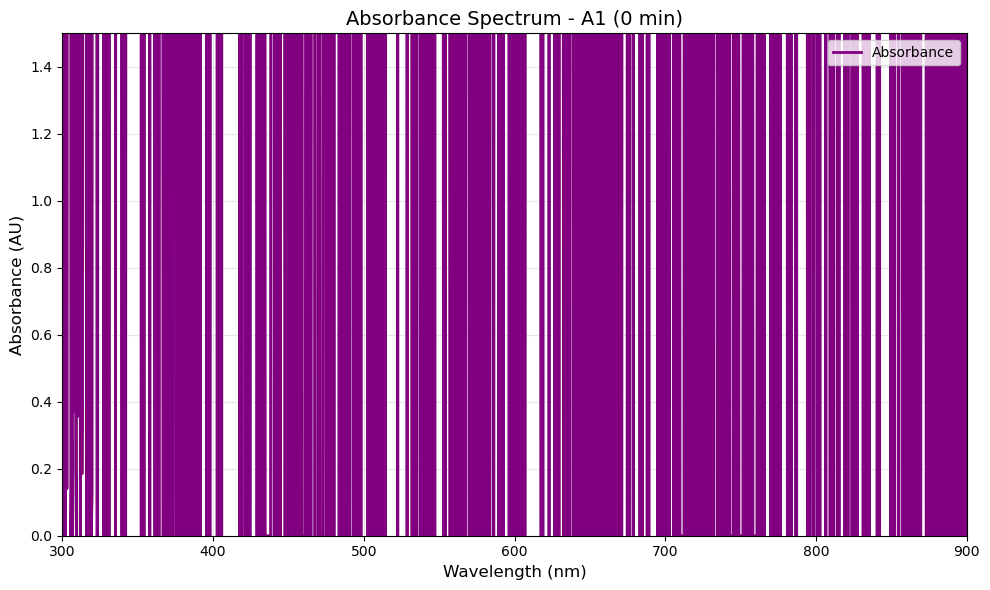

Time till collecting spectrum is: 17.403889656066895
Time till washing probe is: 33.906118392944336
Washed Probe
Time till parking spectrometer is: 42.30401420593262
Parked Spectrometer


In [12]:
timeee = time.time()
axo.pickup_tool(spectrometer)
spectrometer.configure_device()
print("Time to pick up spectrometer is:", time.time() - timeee)

wavelengths_blue, vals_blue, absorbance_blue = spectrometer.collect_spectrum(samples2_spec[0].top(-45), 0, save= True)
spectrometer.plot_spectrum(samples2_spec[0].top(-40), elapsed_min=0, show_plot=True, save_plot=True) 
print("Time till collecting spectrum is:", time.time() - timeee)

spectrometer.wash_probe(solvents[0].top(-35), n_cycles= 2)
print("Time till washing probe is:", time.time() - timeee)
print("Washed Probe")

axo.park_tool()
print("Time till parking spectrometer is:", time.time() - timeee)
print("Parked Spectrometer")